In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
# Load datasets
train_data = pd.read_csv('C:\\Users\\Abdilala\\Documents\\GitHub\\Data-weak4\\Data\\rossmann-store-sales\\train.csv', low_memory=False)
test_data = pd.read_csv('C:\\Users\\Abdilala\\Documents\\GitHub\\Data-weak4\\Data\\rossmann-store-sales\\test.csv', low_memory=False)

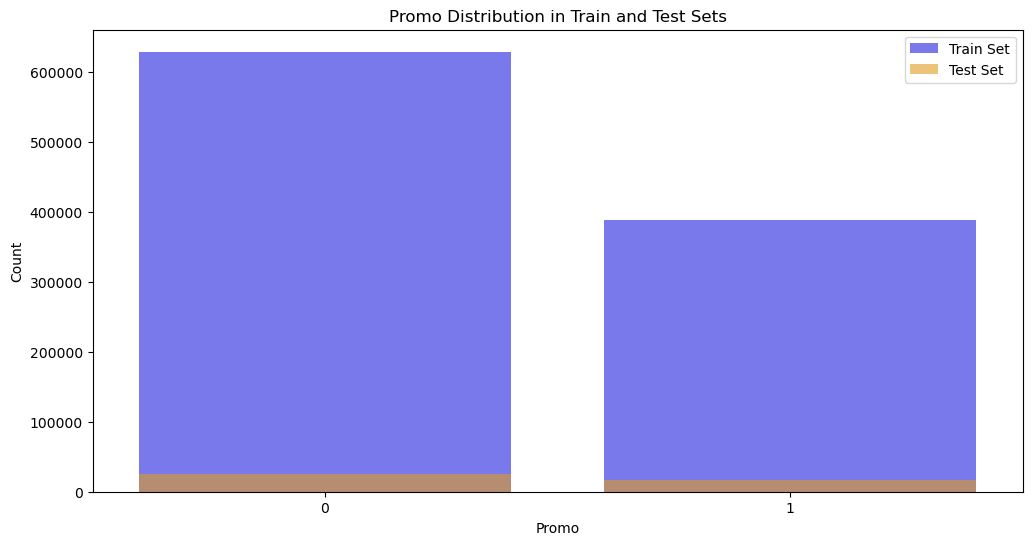

In [198]:
# Check for Promo distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='Promo', color='blue', alpha=0.6, label='Train Set')
sns.countplot(data=test_data, x='Promo', color='orange', alpha=0.6, label='Test Set')
plt.title('Promo Distribution in Train and Test Sets')
plt.xlabel('Promo')
plt.ylabel('Count')
plt.legend()
plt.show()

In [199]:
train_data['Date'] = pd.to_datetime(train_data['Date'])

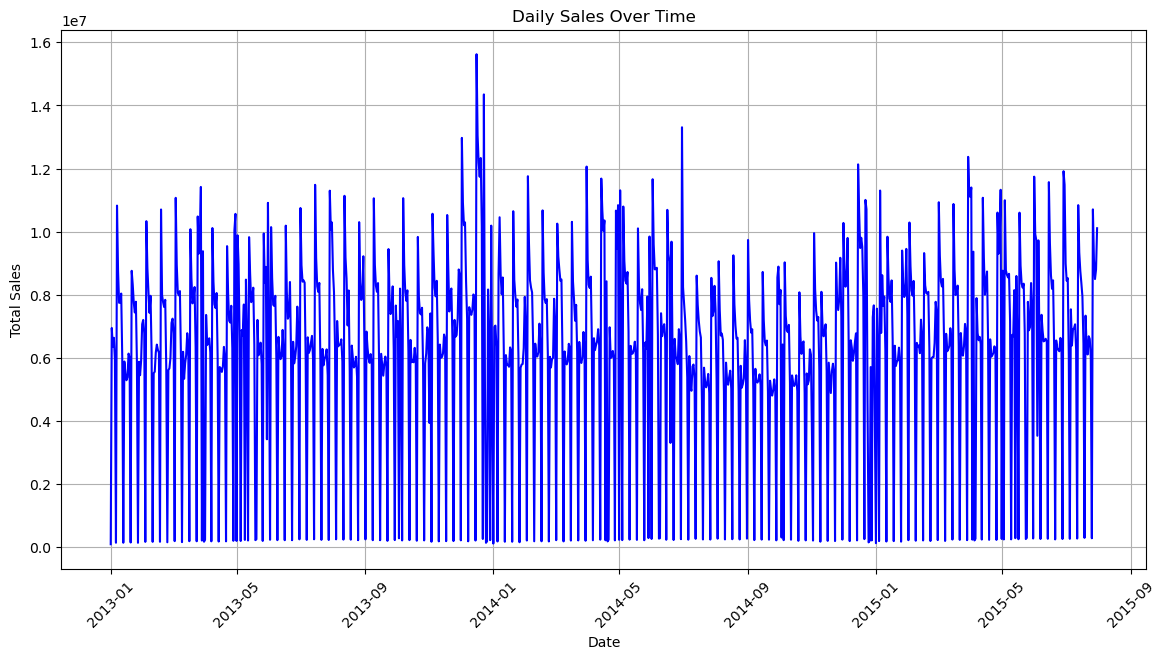

In [200]:
daily_sales = train_data.groupby('Date')['Sales'].sum().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(daily_sales['Date'], daily_sales['Sales'], color='blue')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

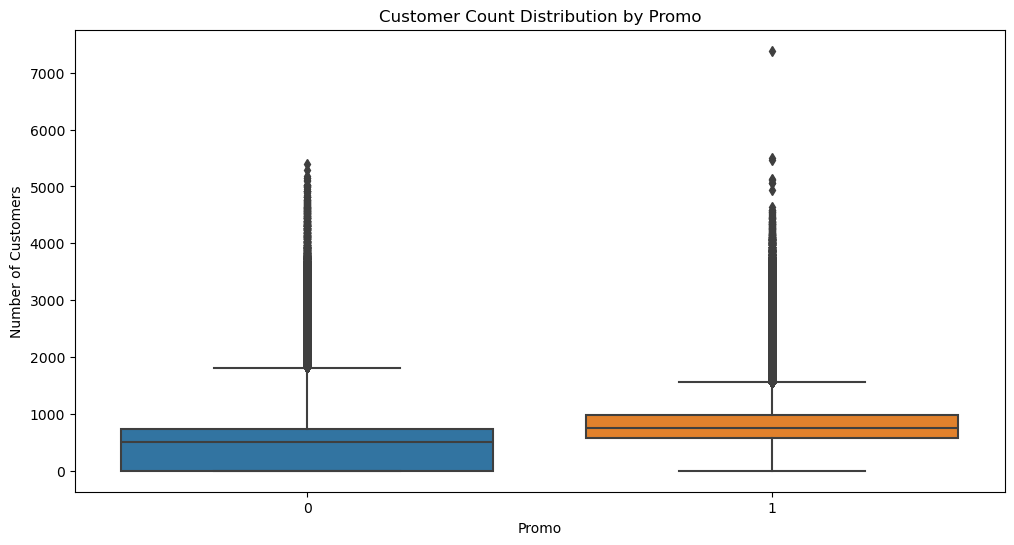

In [201]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='Promo', y='Customers')
plt.title('Customer Count Distribution by Promo')
plt.xlabel('Promo')
plt.ylabel('Number of Customers')
plt.show()

In [202]:
column_list = train_data.columns.tolist()
print("List of Columns:", column_list)

List of Columns: ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']


In [203]:
store_info = pd.read_csv('C:\\Users\\Abdilala\\Documents\\GitHub\\Data-weak4\\Data\\rossmann-store-sales\\store.csv')  # Load the store information data
train_data = train_data.merge(store_info, on='Store', how='left')

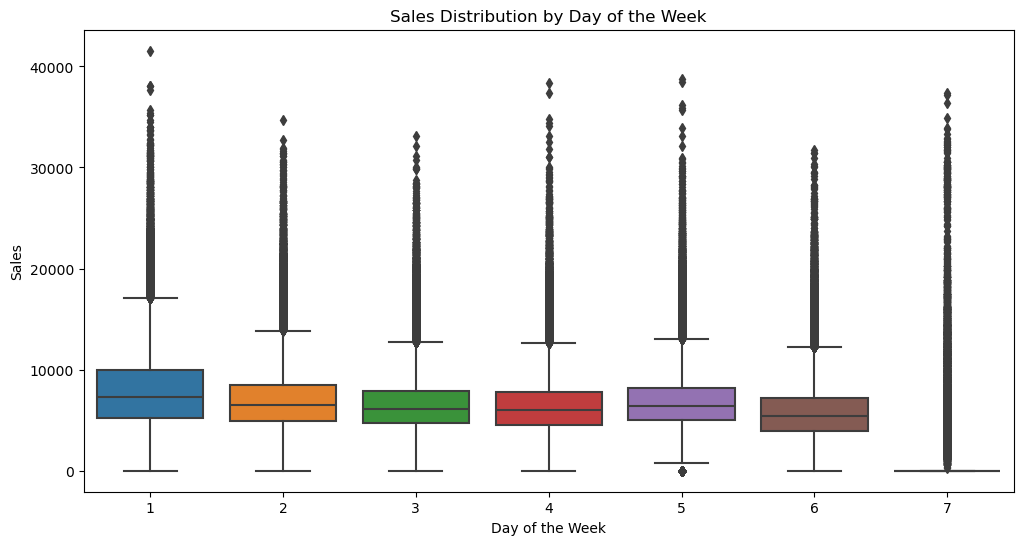

In [204]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='DayOfWeek', y='Sales')
plt.title('Sales Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales')
plt.show()

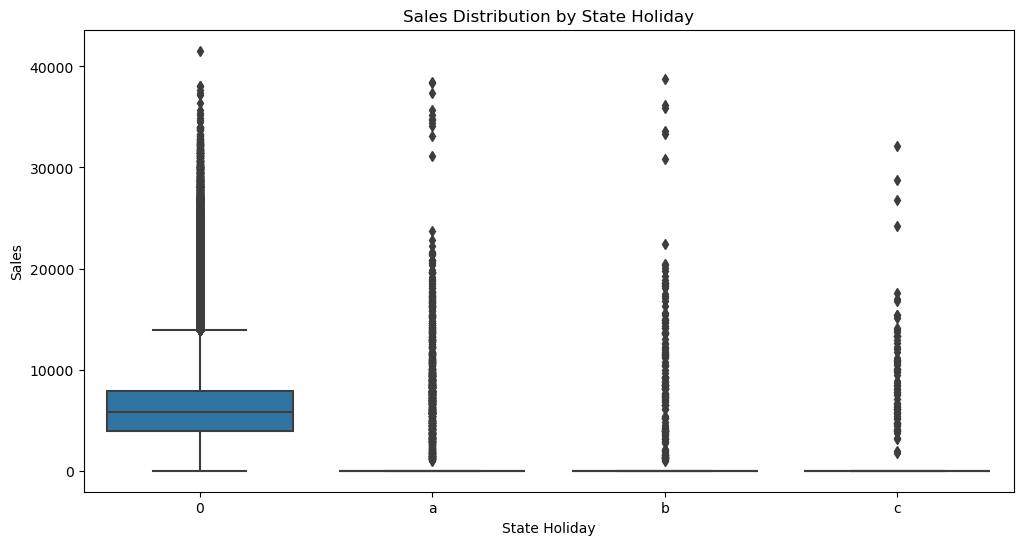

In [205]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='StateHoliday', y='Sales')
plt.title('Sales Distribution by State Holiday')
plt.xlabel('State Holiday')
plt.ylabel('Sales')
plt.show()

In [206]:
import pandas as pd
from datetime import timedelta

In [208]:
def categorize_holiday(row):
    if row['StateHoliday'] != '0':  # During State Holiday
        return 'During State Holiday'
    elif row['SchoolHoliday'] == 1:  # During School Holiday
        return 'During School Holiday'
    else:
        return 'Regular Day'

In [209]:
train_data['Holiday_Category'] = train_data.apply(categorize_holiday, axis=1)

In [210]:
holiday_sales = train_data.groupby('Holiday_Category')['Sales'].mean().reset_index()

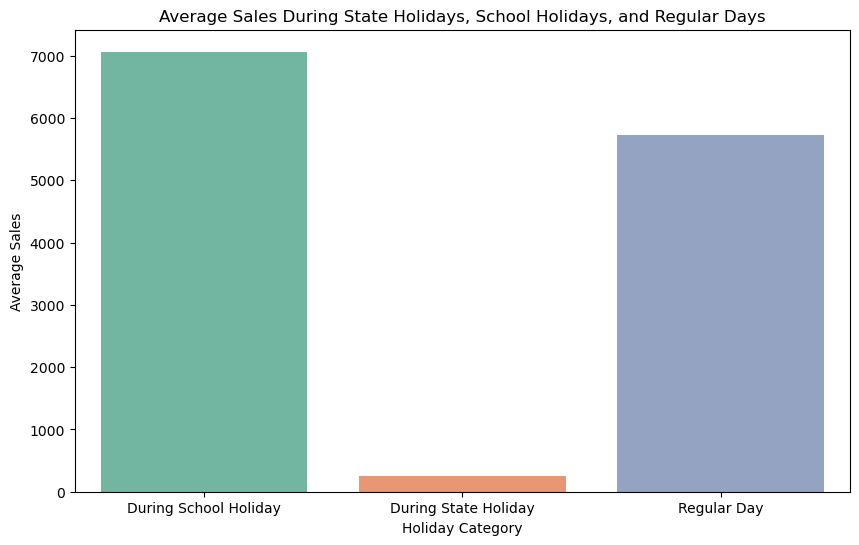

In [211]:

plt.figure(figsize=(10, 6))
sns.barplot(data=holiday_sales, x='Holiday_Category', y='Sales', palette='Set2')
plt.title('Average Sales During State Holidays, School Holidays, and Regular Days')
plt.xlabel('Holiday Category')
plt.ylabel('Average Sales')
plt.show()

In [212]:
holiday_mapping = {
    '0': 'No Holiday',
    'a': 'Public Holiday',
    'b': 'Easter Holiday',
    'c': 'Christmas'
}

In [213]:
train_data['Holiday_Type'] = train_data['StateHoliday'].map(holiday_mapping)

In [214]:
holiday_sales = train_data.groupby('Holiday_Type')['Sales'].mean().reset_index()

In [215]:
print(holiday_sales)

     Holiday_Type        Sales
0       Christmas   168.733171
1  Easter Holiday   214.311510
2      No Holiday  5947.483893
3  Public Holiday   290.735686


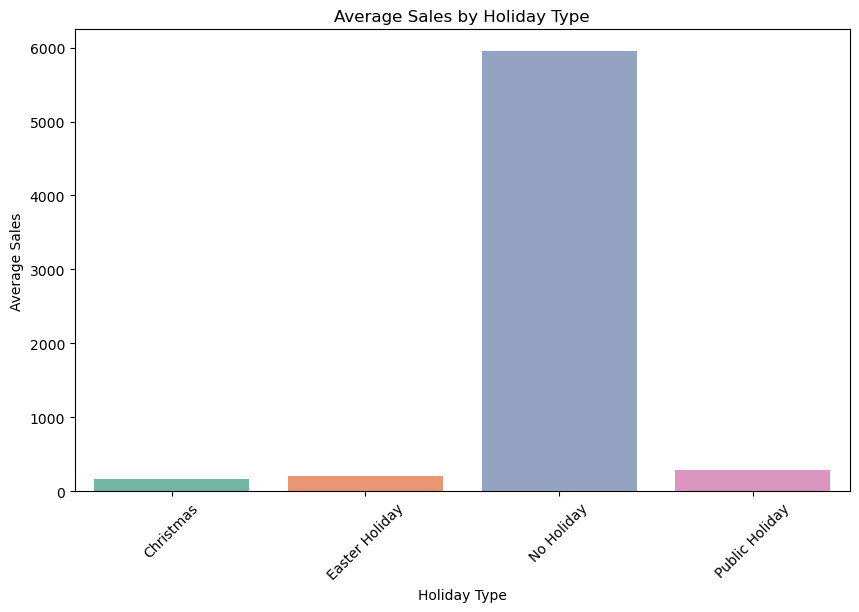

In [216]:
plt.figure(figsize=(10, 6))
sns.barplot(data=holiday_sales, x='Holiday_Type', y='Sales', palette='Set2')
plt.title('Average Sales by Holiday Type')
plt.xlabel('Holiday Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

In [217]:
train_data['Promo_StateHoliday'] = train_data['StateHoliday'] + '_' + train_data['Promo'].astype(str)

In [218]:
promo_holiday_sales = train_data.groupby('Promo_StateHoliday')['Sales'].mean().reset_index()

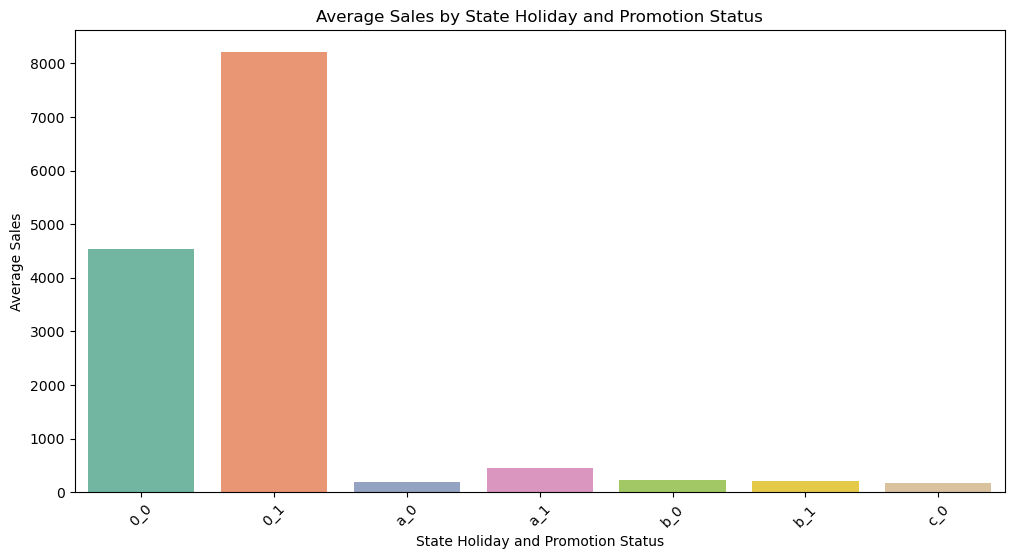

In [219]:
plt.figure(figsize=(12, 6))
sns.barplot(data=promo_holiday_sales, x='Promo_StateHoliday', y='Sales', palette='Set2')
plt.title('Average Sales by State Holiday and Promotion Status')
plt.xlabel('State Holiday and Promotion Status')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

In [220]:
train_data['Day_of_Week'] = train_data['Date'].dt.day_name()

In [221]:
train_data['Promo_Holiday_Day'] = train_data['StateHoliday'] + '_' + train_data['Promo'].astype(str) + '_' + train_data['Day_of_Week']


In [222]:
avg_sales = train_data.groupby('Promo_Holiday_Day')['Sales'].mean().reset_index()

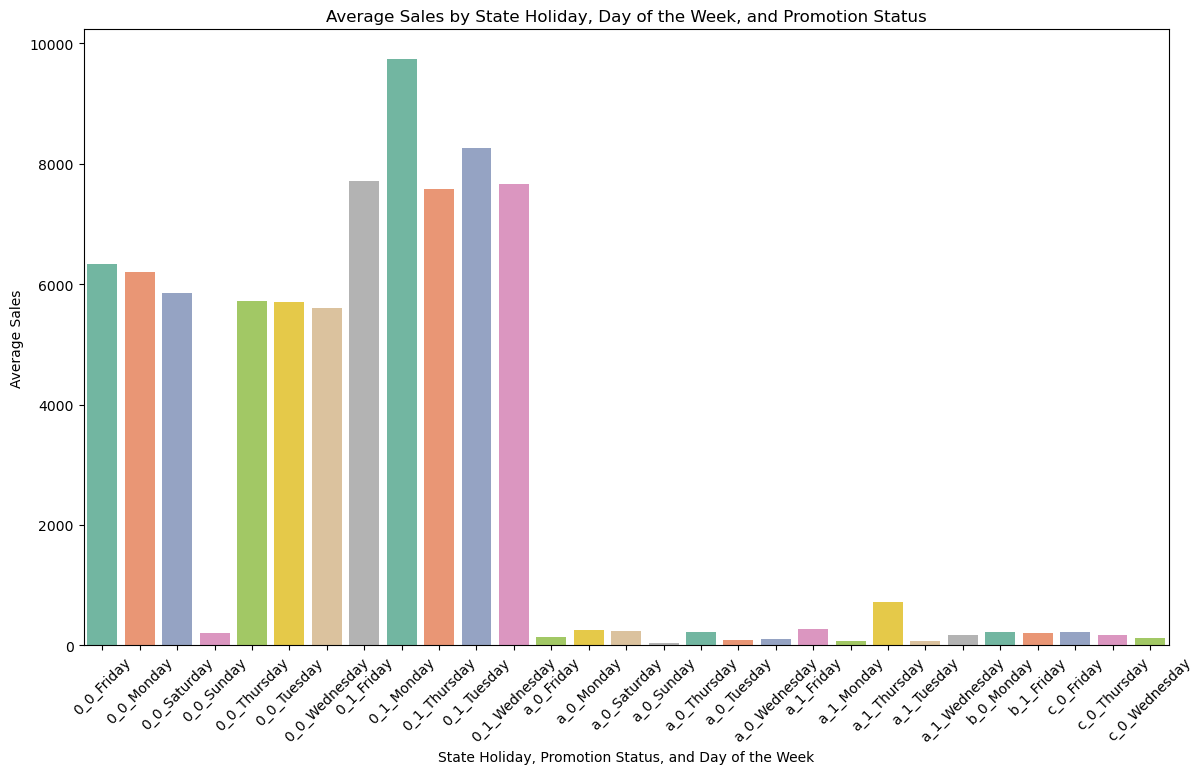

In [223]:
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_sales, x='Promo_Holiday_Day', y='Sales', palette='Set2')
plt.title('Average Sales by State Holiday, Day of the Week, and Promotion Status')
plt.xlabel('State Holiday, Promotion Status, and Day of the Week')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

In [224]:
train_data['DayOfWeek'] = train_data['Date'].dt.day_name()

In [225]:
train_data['Combined_Category'] = (
    train_data['StateHoliday'] + '_' +
    train_data['Promo'].astype(str) + '_' +
    train_data['SchoolHoliday'].astype(str) + '_' +
    train_data['DayOfWeek']
)

In [226]:
avg_sales = train_data.groupby('Combined_Category')['Sales'].mean().reset_index()

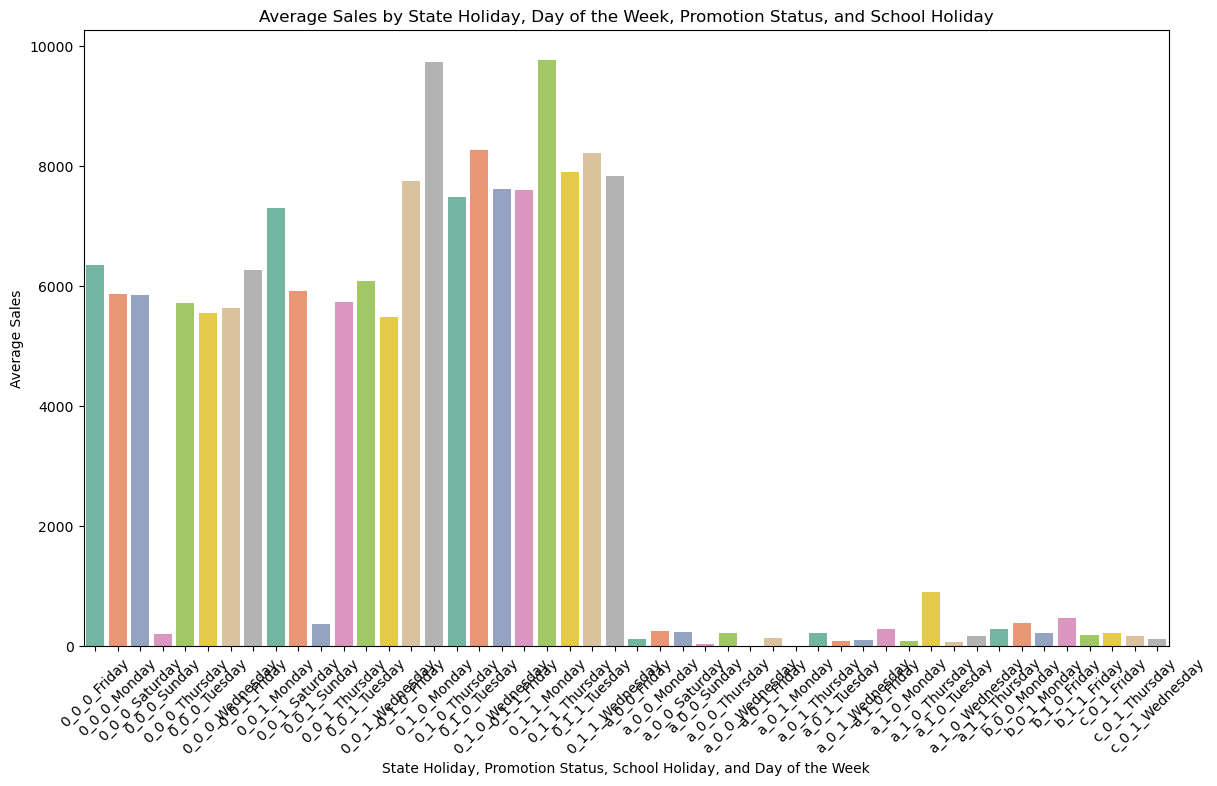

In [227]:
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_sales, x='Combined_Category', y='Sales', palette='Set2')
plt.title('Average Sales by State Holiday, Day of the Week, Promotion Status, and School Holiday')
plt.xlabel('State Holiday, Promotion Status, School Holiday, and Day of the Week')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

In [228]:
correlation = train_data['Sales'].corr(train_data['Customers'])
print(f"Correlation between Sales and Customers: {correlation:.2f}")

Correlation between Sales and Customers: 0.89


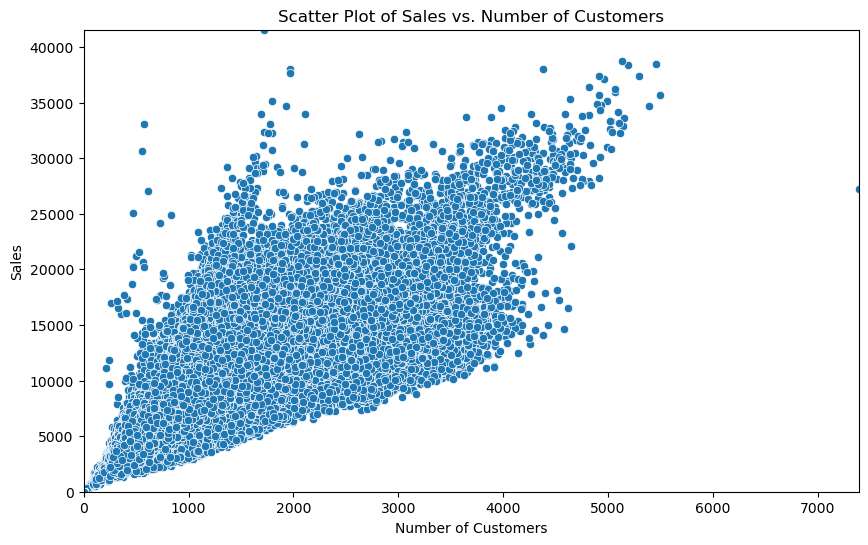

In [229]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customers', y='Sales', data=train_data)
plt.title('Scatter Plot of Sales vs. Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.xlim(0, train_data['Customers'].max())
plt.ylim(0, train_data['Sales'].max())
plt.show()

In [230]:
promo_sales = train_data.groupby('Promo')['Sales'].mean().reset_index()
print(promo_sales)

   Promo        Sales
0      0  4406.050805
1      1  7991.152046


In [231]:
promo_customers = train_data.groupby('Promo')['Customers'].mean().reset_index()
print(promo_customers)

   Promo   Customers
0      0  517.823542
1      1  820.098815


In [232]:
existing_customers_sales = train_data[train_data['Customers'] > 0].groupby('Promo')['Sales'].mean().reset_index()
print(existing_customers_sales)

   Promo        Sales
0      0  5929.826183
1      1  8228.696063


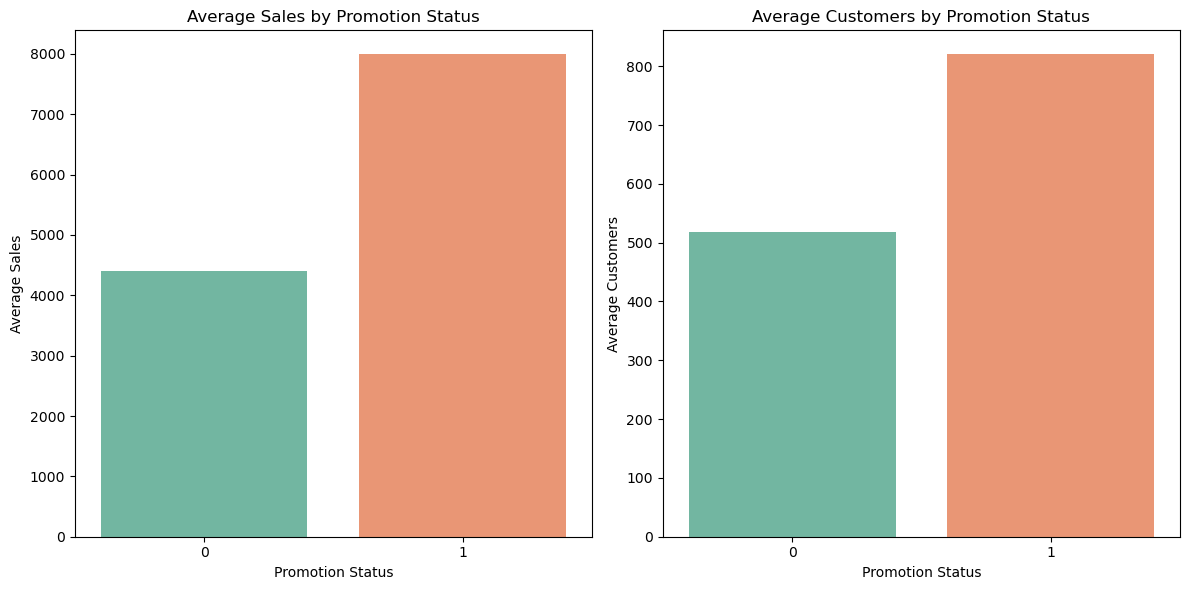

In [233]:
combined_data = promo_sales.merge(promo_customers, on='Promo', suffixes=('_Sales', '_Customers'))

# Plot average sales and customer counts by promo status
plt.figure(figsize=(12, 6))

# Bar plot for average sales
plt.subplot(1, 2, 1)
sns.barplot(data=combined_data, x='Promo', y='Sales', palette='Set2')
plt.title('Average Sales by Promotion Status')
plt.xlabel('Promotion Status')
plt.ylabel('Average Sales')

# Bar plot for average customers
plt.subplot(1, 2, 2)
sns.barplot(data=combined_data, x='Promo', y='Customers', palette='Set2')
plt.title('Average Customers by Promotion Status')
plt.xlabel('Promotion Status')
plt.ylabel('Average Customers')

plt.tight_layout()
plt.show()

In [234]:
store_performance = train_data.groupby(['Store', 'Promo'])['Sales'].mean().unstack().reset_index()
print(store_performance)

Promo  Store             0             1
0          1   3198.994845   5152.886111
1          2   2855.058419   6172.816667
2          3   3967.596220   8608.666667
3          4   6568.939863  10370.511111
4          5   2582.271478   5944.266667
...      ...           ...           ...
1110    1111   3073.487973   6395.294444
1111    1112   5975.537801  12490.363889
1112    1113   4400.362543   7320.086111
1113    1114  14477.742268  21601.497222
1114    1115   4082.221649   7073.266667

[1115 rows x 3 columns]


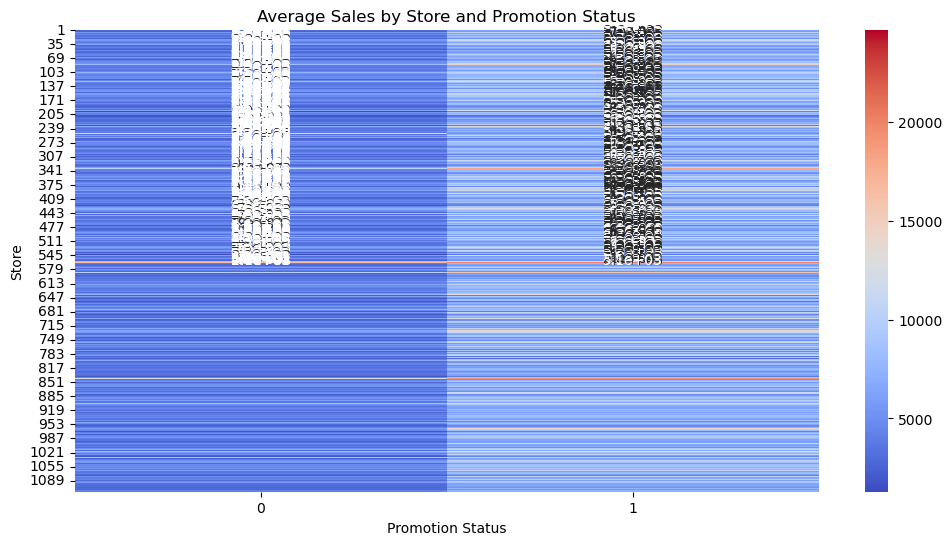

In [51]:
plt.figure(figsize=(12, 6))
sns.heatmap(store_performance.set_index('Store'), annot=True, cmap='coolwarm')
plt.title('Average Sales by Store and Promotion Status')
plt.xlabel('Promotion Status')
plt.ylabel('Store')
plt.show()


In [235]:
print(store_performance.columns)

Index(['Store', 0, 1], dtype='object', name='Promo')


In [236]:
store_performance = train_data.groupby(['Store', 'Promo'])['Sales'].mean().reset_index()
print(store_performance.head()) 

   Store  Promo        Sales
0      1      0  3198.994845
1      1      1  5152.886111
2      2      0  2855.058419
3      2      1  6172.816667
4      3      0  3967.596220


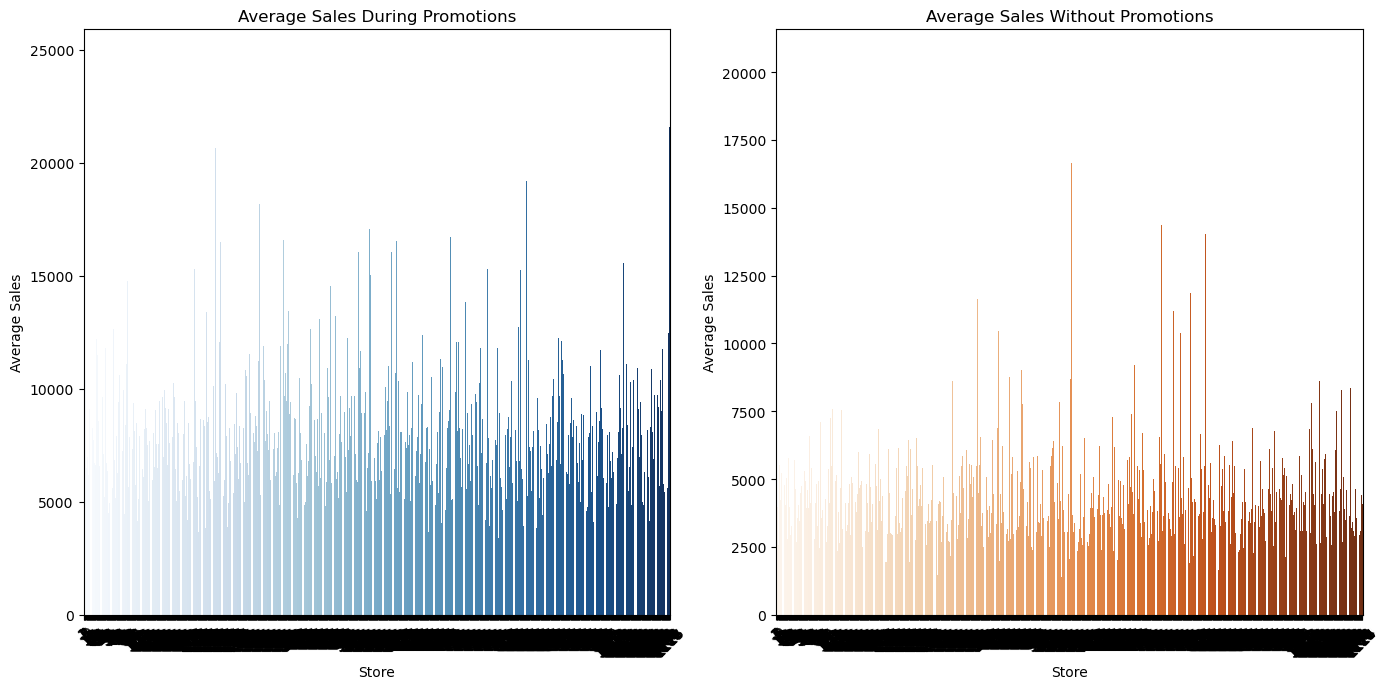

In [237]:
plt.figure(figsize=(14, 7))

# Bar plot for average sales during promotions
plt.subplot(1, 2, 1)
sns.barplot(data=store_performance[store_performance['Promo'] == 1], 
            x='Store', y='Sales', palette='Blues')
plt.title('Average Sales During Promotions')
plt.xlabel('Store')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)

# Bar plot for average sales without promotions
plt.subplot(1, 2, 2)
sns.barplot(data=store_performance[store_performance['Promo'] == 0], 
            x='Store', y='Sales', palette='Oranges')
plt.title('Average Sales Without Promotions')
plt.xlabel('Store')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [238]:
baseline_sales = train_data[train_data['Promo'] == 0]['Sales'].mean()
promo_sales = train_data[train_data['Promo'] == 1]['Sales'].mean()
uplift = (promo_sales - baseline_sales) / baseline_sales * 100
print(f"Sales uplift during promotions: {uplift:.2f}%")

Sales uplift during promotions: 81.37%


In [239]:
train_data['Hour'] = train_data['Date'].dt.hour

In [240]:
train_data['Hour'] = 12

In [241]:
hourly_customers = train_data.groupby('Hour')['Customers'].mean().reset_index()

In [242]:
print(train_data.isin([float('inf'), float('-inf')]).sum())

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Holiday_Category             0
Holiday_Type                 0
Promo_StateHoliday           0
Day_of_Week                  0
Promo_Holiday_Day            0
Combined_Category            0
Hour                         0
dtype: int64


In [243]:
infinite_values = train_data.isin([float('inf'), float('-inf')]).sum()
print(infinite_values[infinite_values > 0])

Series([], dtype: int64)


In [244]:
import numpy as np
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [245]:
hourly_customers = train_data.groupby('Hour')['Customers'].mean().reset_index()

In [246]:
print(train_data['Customers'].describe())

count    1.017209e+06
mean     6.331459e+02
std      4.644117e+02
min      0.000000e+00
25%      4.050000e+02
50%      6.090000e+02
75%      8.370000e+02
max      7.388000e+03
Name: Customers, dtype: float64


In [247]:
print(train_data['Customers'].isna().sum())

0


In [248]:
zero_customers_count = (train_data['Customers'] == 0).sum()
print(f"Number of entries with zero customers: {zero_customers_count}")

Number of entries with zero customers: 172869


In [249]:
hourly_distribution = train_data.groupby('Hour')['Customers'].count().reset_index()
hourly_distribution.columns = ['Hour', 'Total Entries']

In [250]:
hourly_zero_counts = train_data.groupby('Hour')['Customers'].apply(lambda x: (x == 0).sum()).reset_index()
hourly_zero_counts.columns = ['Hour', 'Zero Customers Count']

In [251]:
hourly_analysis = hourly_distribution.merge(hourly_zero_counts, on='Hour')
print(hourly_analysis)

   Hour  Total Entries  Zero Customers Count
0    12        1017209                172869


In [252]:
hourly_customers = train_data[train_data['Customers'] > 0].groupby('Hour')['Customers'].mean().reset_index()

In [160]:
print(train_data['Hour'].head())

0    12
1    12
2    12
3    12
4    12
Name: Hour, dtype: int64


In [253]:
print(train_data['Date'].head())

0   2015-07-31
1   2015-07-31
2   2015-07-31
3   2015-07-31
4   2015-07-31
Name: Date, dtype: datetime64[ns]


   Hour   Customers
0    12  762.775369


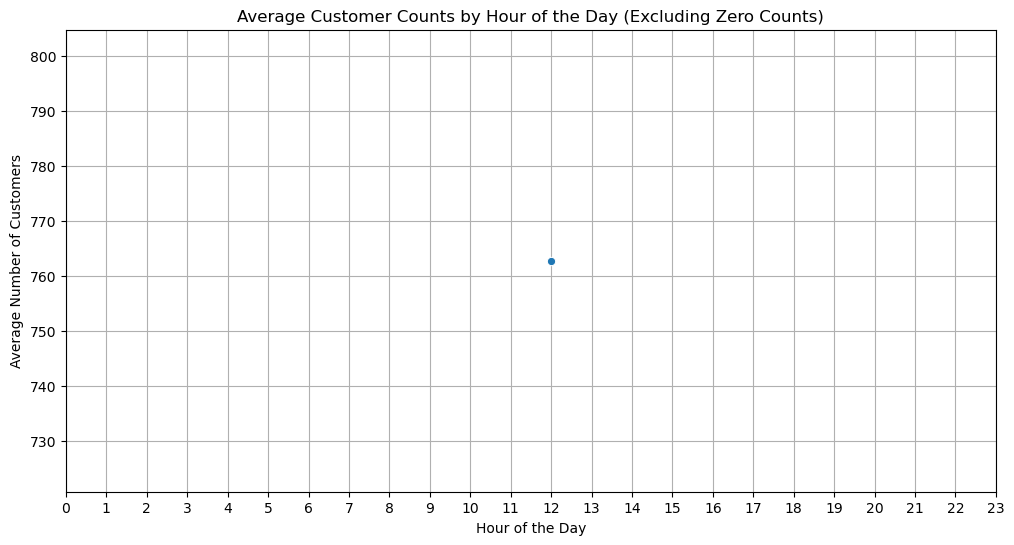

In [254]:
print(hourly_customers)

# Create the line plot if data exists
if not hourly_customers.empty:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=hourly_customers, x='Hour', y='Customers', marker='o')
    plt.title('Average Customer Counts by Hour of the Day (Excluding Zero Counts)')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Number of Customers')
    plt.xticks(range(0, 24))  # Show all hours
    plt.grid()
    plt.show()
else:
    print("No data available for plotting.")

In [255]:
print(train_data['DayOfWeek'].dtype)
print(train_data['DayOfWeek'].unique())

object
['Friday' 'Thursday' 'Wednesday' 'Tuesday' 'Monday' 'Sunday' 'Saturday']


In [256]:
train_data['DayOfWeek'] = pd.to_numeric(train_data['DayOfWeek'], errors='coerce')


In [257]:
print(train_data['DayOfWeek'].isna().sum())

1017209


In [258]:
weekday_open_stores = train_data[
    (train_data['DayOfWeek'] >= 1) &  # Monday
    (train_data['DayOfWeek'] <= 5) &  # Friday
    (train_data['Open'] == 1)          # Open status
]

In [259]:
open_weekday_stores = weekday_open_stores['Store'].unique()
print("Stores open on all weekdays:", open_weekday_stores)

Stores open on all weekdays: []


In [260]:
weekend_sales = train_data[
    (train_data['Store'].isin(open_weekday_stores)) &
    (train_data['DayOfWeek'] >= 6)  # 6 = Saturday, 0 = Sunday
]


In [261]:
# Aggregate weekend sales by store
weekend_sales_summary = weekend_sales.groupby('Store')['Sales'].sum().reset_index()
weekend_sales_summary.columns = ['Store', 'Weekend_Sales']
print(weekend_sales_summary)


Empty DataFrame
Columns: [Store, Weekend_Sales]
Index: []


In [262]:
print(train_data['Open'].unique())
print(train_data['DayOfWeek'].unique())

[1 0]
[nan]


In [263]:
train_data = train_data.dropna(subset=['DayOfWeek'])

In [264]:
print(train_data['Open'].unique())
print(train_data['DayOfWeek'].unique())

[]
[]


In [265]:
print(train_data.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Holiday_Category', 'Holiday_Type',
       'Promo_StateHoliday', 'Day_of_Week', 'Promo_Holiday_Day',
       'Combined_Category', 'Hour'],
      dtype='object')


In [266]:
print(train_data[['Open', 'DayOfWeek']].isna().sum())

Open         0
DayOfWeek    0
dtype: int64


In [179]:
print(train_data[train_data['Open'].isna() | train_data['DayOfWeek'].isna()].head())

Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday, Holiday_Type, Promo_StateHoliday, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval, Holiday_Category, Day_of_Week, Promo_Holiday_Day, Combined_Category, Hour]
Index: []

[0 rows x 25 columns]


In [181]:
print(train_data[['Open', 'DayOfWeek']].dtypes)

Open           int64
DayOfWeek    float64
dtype: object


In [182]:
train_data['DayOfWeek'] = train_data['DayOfWeek'].fillna(0).astype(int)

In [183]:
print("Unique values in 'Open':", train_data['Open'].unique())
print("Unique values in 'DayOfWeek':", train_data['DayOfWeek'].unique())

Unique values in 'Open': []
Unique values in 'DayOfWeek': []


In [184]:
weekday_open_stores = train_data[
    (train_data['DayOfWeek'] >= 1) &  # Monday
    (train_data['DayOfWeek'] <= 5) &  # Friday
    (train_data['Open'] == 1)          # Open status
]['Store'].unique()


In [185]:
print("Stores open on all weekdays:", weekday_open_stores)

Stores open on all weekdays: []


In [186]:
weekend_sales = train_data[
    (train_data['Store'].isin(weekday_open_stores)) &
    (train_data['DayOfWeek'] >= 6)  # 6 = Saturday, 0 = Sunday
]


In [187]:
weekend_sales_summary = weekend_sales.groupby('Store')['Sales'].sum().reset_index()
weekend_sales_summary.columns = ['Store', 'Weekend_Sales']
print(weekend_sales_summary)

Empty DataFrame
Columns: [Store, Weekend_Sales]
Index: []


In [188]:
print(train_data.head(20)) 

Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday, Holiday_Type, Promo_StateHoliday, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval, Holiday_Category, Day_of_Week, Promo_Holiday_Day, Combined_Category, Hour]
Index: []

[0 rows x 25 columns]


In [189]:
print("Unique values in 'Open':", train_data['Open'].unique())
print("Unique values in 'DayOfWeek':", train_data['DayOfWeek'].unique())

Unique values in 'Open': []
Unique values in 'DayOfWeek': []


In [190]:
print(train_data[train_data['Open'].isnull() | (train_data['Open'] < 0)])
print(train_data[train_data['DayOfWeek'].isnull() | (train_data['DayOfWeek'] < 0)])

Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday, Holiday_Type, Promo_StateHoliday, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval, Holiday_Category, Day_of_Week, Promo_Holiday_Day, Combined_Category, Hour]
Index: []

[0 rows x 25 columns]
Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday, Holiday_Type, Promo_StateHoliday, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval, Holiday_Category, Day_of_Week, Promo_Holiday_Day, Combined_Category, Hour]
Index: []

[0 rows x 25 columns]


In [191]:
print("Shape of train_data:", train_data.shape)


Shape of train_data: (0, 25)


In [192]:
print("Total rows in train_data:", len(train_data))

Total rows in train_data: 0


In [193]:
print("Shape of train_data:", train_data.shape)

Shape of train_data: (0, 25)


In [268]:
import pandas as pd

In [269]:
store_data = pd.read_csv('C:\\Users\\Abdilala\\Documents\\GitHub\\Data-weak4\\Data\\rossmann-store-sales\\store.csv')
print("Store data shape:", store_data.shape)
print(store_data.head())

Store data shape: (1115, 10)
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  

In [273]:
train_data = pd.read_csv('C:\\Users\\Abdilala\\Documents\\GitHub\\Data-weak4\\Data\\rossmann-store-sales\\train.csv', low_memory=False)
print("Train data shape:", train_data.shape)
print(train_data.head())

Train data shape: (1017209, 9)
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


In [274]:
print("Unique values in 'Open':", train_data['Open'].unique())
print("Unique values in 'DayOfWeek':", train_data['DayOfWeek'].unique())

Unique values in 'Open': [1 0]
Unique values in 'DayOfWeek': [5 4 3 2 1 7 6]


In [275]:
print(train_data.dtypes)

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object


In [276]:
print(train_data[train_data['Open'] < 0]) 

Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday]
Index: []


In [277]:
print(train_data[train_data['DayOfWeek'] < 0])
print(train_data[train_data['DayOfWeek'] > 7])

Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday]
Index: []
Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday]
Index: []


In [278]:
print(train_data['DayOfWeek'].dtype)
print(train_data['DayOfWeek'].unique())

int64
[5 4 3 2 1 7 6]


In [280]:
weekday_open_stores = train_data[
    (train_data['DayOfWeek'] >= 1) &  # Monday
    (train_data['DayOfWeek'] <= 6) &  # Friday
    (train_data['Open'] == 1)          # Open status
]

In [281]:
open_weekday_stores = weekday_open_stores['Store'].unique()
print("Stores open on all weekdays:", open_weekday_stores)

Stores open on all weekdays: [   1    2    3 ... 1115  876  292]


In [282]:
weekend_sales = train_data[
    (train_data['Store'].isin(open_weekday_stores)) &
    (train_data['DayOfWeek'] >= 6)  
]

In [283]:
weekend_sales_summary = weekend_sales.groupby('Store')['Sales'].sum().reset_index()
weekend_sales_summary.columns = ['Store', 'Weekend_Sales']
print(weekend_sales_summary)

      Store  Weekend_Sales
0         1         662358
1         2         384996
2         3         594242
3         4        1355202
4         5         278600
...     ...            ...
1110   1111         440689
1111   1112        1151380
1112   1113         789739
1113   1114        2939357
1114   1115         907634

[1115 rows x 2 columns]


In [284]:
all_weekend_sales = train_data[train_data['DayOfWeek'] >= 6]

In [285]:
# Aggregate weekend sales for all stores
all_weekend_sales_summary = all_weekend_sales.groupby('Store')['Sales'].sum().reset_index()
all_weekend_sales_summary.columns = ['Store', 'All_Weekend_Sales']

In [286]:
# Merge summaries for comparison
comparison = weekend_sales_summary.merge(all_weekend_sales_summary, on='Store', how='outer')
comparison['Sales_Impact'] = comparison['Weekend_Sales'] / comparison['All_Weekend_Sales']

# Print comparison results
print(comparison)

      Store  Weekend_Sales  All_Weekend_Sales  Sales_Impact
0         1         662358             662358           1.0
1         2         384996             384996           1.0
2         3         594242             594242           1.0
3         4        1355202            1355202           1.0
4         5         278600             278600           1.0
...     ...            ...                ...           ...
1110   1111         440689             440689           1.0
1111   1112        1151380            1151380           1.0
1112   1113         789739             789739           1.0
1113   1114        2939357            2939357           1.0
1114   1115         907634             907634           1.0

[1115 rows x 4 columns]


In [287]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

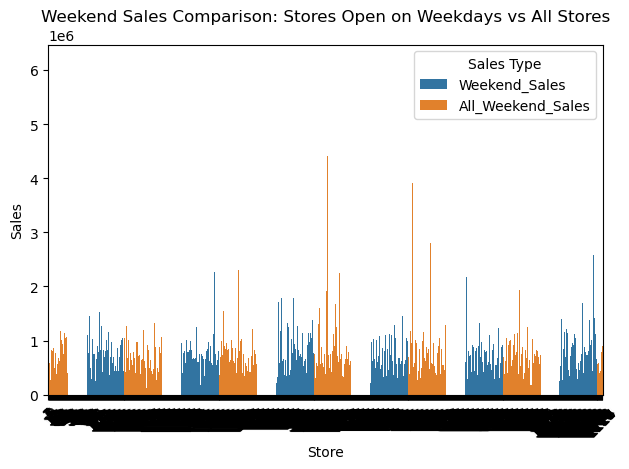

In [288]:
comparison_melted = comparison.melt(id_vars='Store', value_vars=['Weekend_Sales', 'All_Weekend_Sales'],
                                     var_name='Sales_Type', value_name='Sales')

# Create the bar plot
sns.barplot(data=comparison_melted, x='Store', y='Sales', hue='Sales_Type')

# Adding titles and labels
plt.title('Weekend Sales Comparison: Stores Open on Weekdays vs All Stores')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Sales Type')
plt.tight_layout()

# Show the plot
plt.show()

In [306]:
merged_data = train_data.merge(store_data, on='Store', how='left')

In [307]:
print(merged_data.head())

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                   

In [308]:
assortment_sales = merged_data.groupby('Assortment')['Sales'].agg(['sum', 'mean', 'count']).reset_index()
assortment_sales.columns = ['Assortment', 'Total_Sales', 'Average_Sales', 'Store_Count']

In [309]:
print(assortment_sales)

  Assortment  Total_Sales  Average_Sales  Store_Count
0          a   2945750070    5481.026096       537445
1          b     70946312    8553.931999         8294
2          c   2856484241    6058.676567       471470


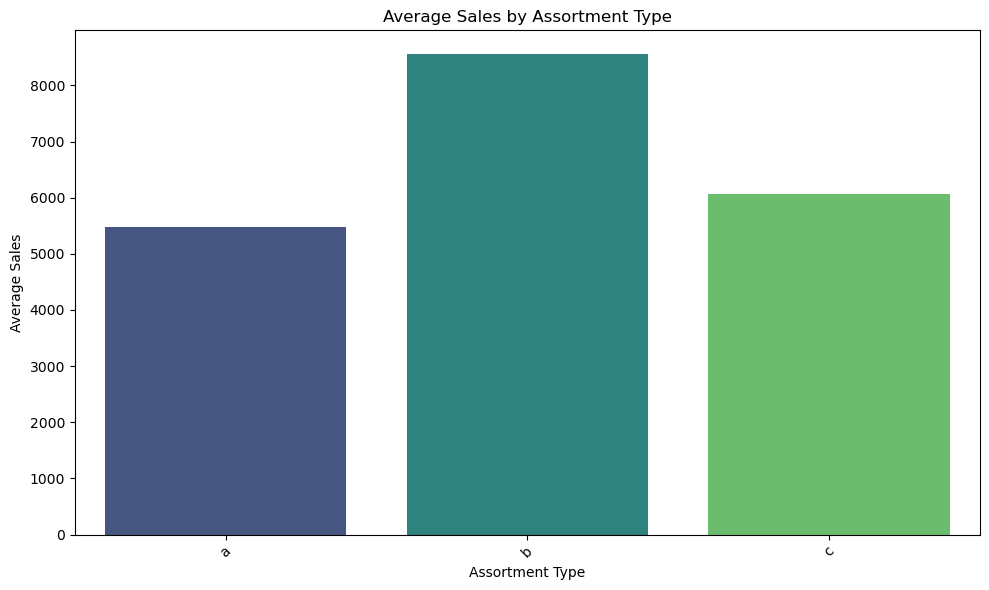

In [310]:
plt.figure(figsize=(10, 6))

#  bar plot for average sales by assortment type
sns.barplot(data=assortment_sales, x='Assortment', y='Average_Sales', palette='viridis')

# Adding titles and labels
plt.title('Average Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [297]:
column_list = merged_data.columns.tolist()
print("List of Columns:", column_list)

List of Columns: ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [311]:
competition_distance_sales = merged_data.groupby('CompetitionDistance')['Sales'].agg(['sum', 'mean', 'count']).reset_index()
competition_distance_sales.columns = ['CompetitionDistance', 'Total_Sales', 'Average_Sales', 'Store_Count']

In [312]:
print(competition_distance_sales)

     CompetitionDistance  Total_Sales  Average_Sales  Store_Count
0                   20.0      4579807    4861.790870          942
1                   30.0     17552666    4659.587470         3767
2                   40.0     29261626    6212.659448         4710
3                   50.0     60835848    8072.697452         7536
4                   60.0     22088359    7816.121373         2826
..                   ...          ...            ...          ...
649              45740.0      6261174    6646.681529          942
650              46590.0      3554993    3773.877919          942
651              48330.0      3798660    4032.547771          942
652              58260.0      5718883    6071.001062          942
653              75860.0      6896821    7321.466030          942

[654 rows x 4 columns]


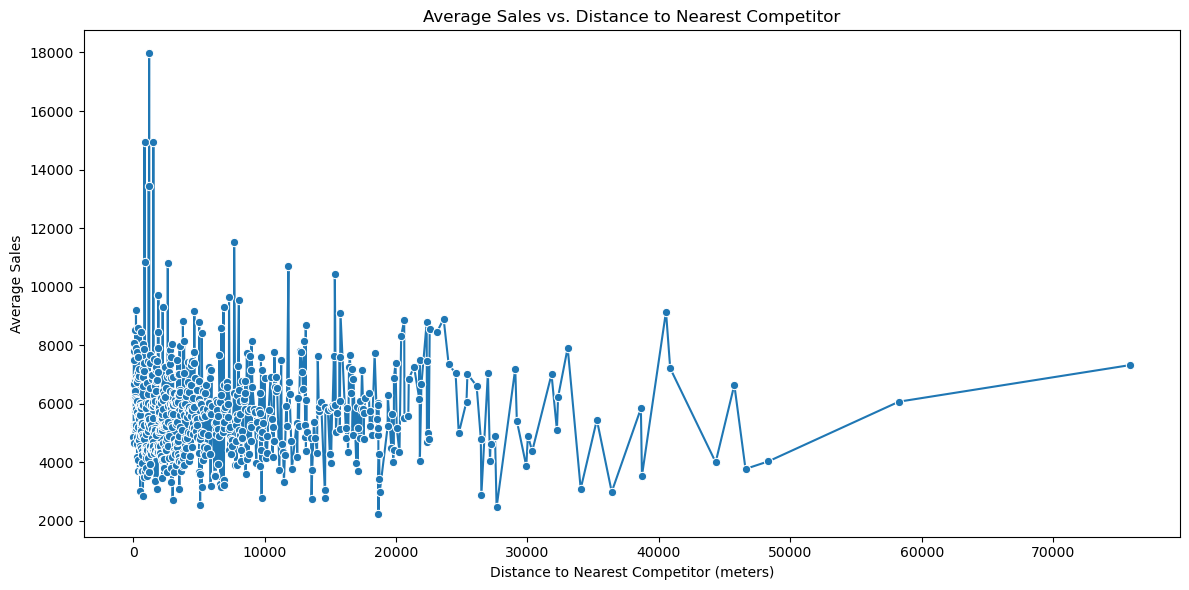

In [313]:
plt.figure(figsize=(12, 6))

# Create a line plot for average sales by competition distance
sns.lineplot(data=competition_distance_sales, x='CompetitionDistance', y='Average_Sales', marker='o')

# Adding titles and labels
plt.title('Average Sales vs. Distance to Nearest Competitor')
plt.xlabel('Distance to Nearest Competitor (meters)')
plt.ylabel('Average Sales')
plt.tight_layout()

# Show the plot
plt.show()

In [316]:
import pandas as pd

In [318]:
store = pd.read_csv('C:\\Users\\Abdilala\\Documents\\GitHub\\Data-weak4\\Data\\rossmann-store-sales\\store.csv')
print("Store data shape:", store.shape)
print(store.head())

Store data shape: (1115, 10)
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  

In [319]:
train_set = pd.read_csv('C:\\Users\\Abdilala\\Documents\\GitHub\\Data-weak4\\Data\\rossmann-store-sales\\train.csv', low_memory=False)
print("Train data shape:", train_set.shape)
print(train_set.head())

Train data shape: (1017209, 9)
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


In [342]:
merged_set = train_set.merge(store, on='Store', how='left')

In [343]:
store_type_distance_sales = merged_set.groupby(['StoreType', 'CompetitionDistance'])['Sales'].agg(['sum', 'mean', 'count']).reset_index()
store_type_distance_sales.columns = ['StoreType', 'CompetitionDistance', 'Total_Sales', 'Average_Sales', 'Store_Count']

In [344]:
# Display the results
print(store_type_distance_sales)

    StoreType  CompetitionDistance  Total_Sales  Average_Sales  Store_Count
0           a                 20.0      4579807    4861.790870          942
1           a                 30.0     17552666    4659.587470         3767
2           a                 40.0     24241845    6433.610669         3768
3           a                 50.0     38520156    8178.377070         4710
4           a                 60.0     14664893    7783.913482         1884
..        ...                  ...          ...            ...          ...
825         d              29070.0      6784716    7202.458599          942
826         d              32240.0      4802197    5097.873673          942
827         d              32330.0      5871619    6233.141189          942
828         d              38630.0      5499540    5838.152866          942
829         d              48330.0      3798660    4032.547771          942

[830 rows x 5 columns]


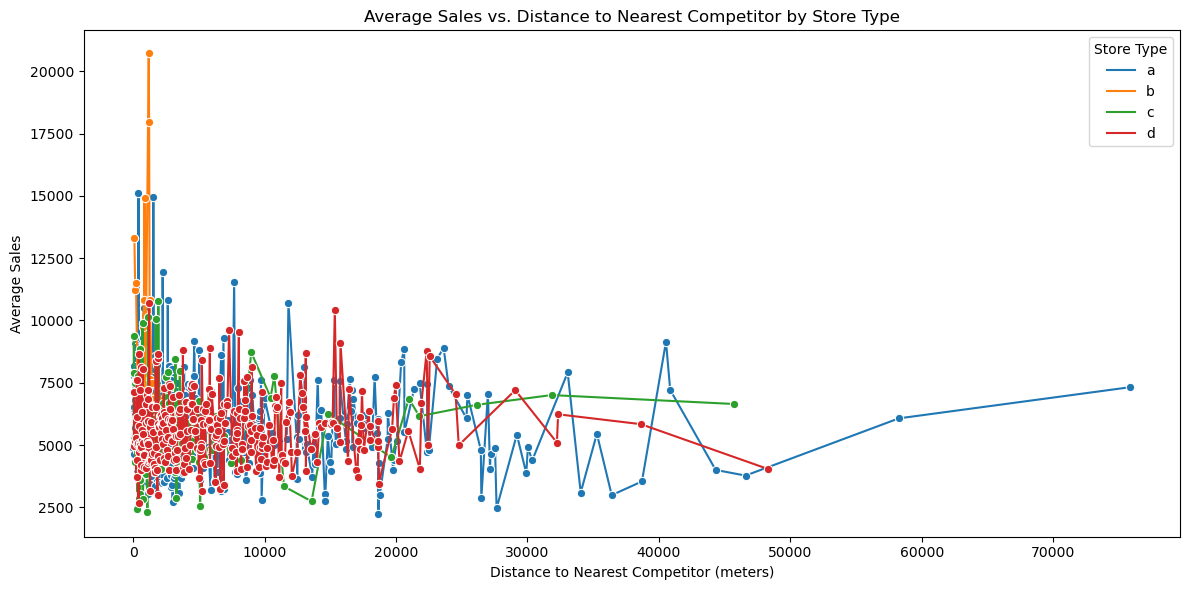

In [345]:
plt.figure(figsize=(12, 6))

# Create a line plot for average sales by competition distance for each store type
sns.lineplot(data=store_type_distance_sales, x='CompetitionDistance', y='Average_Sales', hue='StoreType', marker='o')

# Adding titles and labels
plt.title('Average Sales vs. Distance to Nearest Competitor by Store Type')
plt.xlabel('Distance to Nearest Competitor (meters)')
plt.ylabel('Average Sales')
plt.legend(title='Store Type')
plt.tight_layout()

# Show the plot
plt.show()

In [346]:
changing_distance_stores = merged_set[merged_set['CompetitionDistance'].isna()]

In [347]:
stores_with_changes = changing_distance_stores['Store'].unique()

In [348]:
valid_distance_stores = merged_set[merged_set['Store'].isin(stores_with_changes) & merged_set['CompetitionDistance'].notna()]


In [349]:
print(valid_distance_stores[['Store', 'Date', 'CompetitionDistance', 'Sales']])

Empty DataFrame
Columns: [Store, Date, CompetitionDistance, Sales]
Index: []


In [351]:
sales_comparison = []

for store in stores_with_changes:
    # Get sales data for this store
    store_data = merged_set[merged_set['Store'] == store]
    
    # Get entries where CompetitionDistance was initially NA (before competitor opened)
    before_data = store_data[store_data['CompetitionDistance'].isna()]
    
    # Get entries where CompetitionDistance is now valid (after competitor opened)
    after_data = store_data[store_data['CompetitionDistance'].notna()]
    
    # Calculate average sales before and after
    avg_sales_before = before_data['Sales'].mean() if not before_data.empty else 0
    avg_sales_after = after_data['Sales'].mean() if not after_data.empty else 0
    
    # Append results
    sales_comparison.append({
        'Store': store,
        'Avg_Sales_Before': avg_sales_before,
        'Avg_Sales_After': avg_sales_after
    })


In [352]:
sales_comparison_df = pd.DataFrame(sales_comparison)

# Display the comparison results
print(sales_comparison_df)

   Store  Avg_Sales_Before  Avg_Sales_After
0    291       6643.281316                0
1    622       3593.717622                0
2    879       3087.831135                0


<Figure size 1200x600 with 0 Axes>

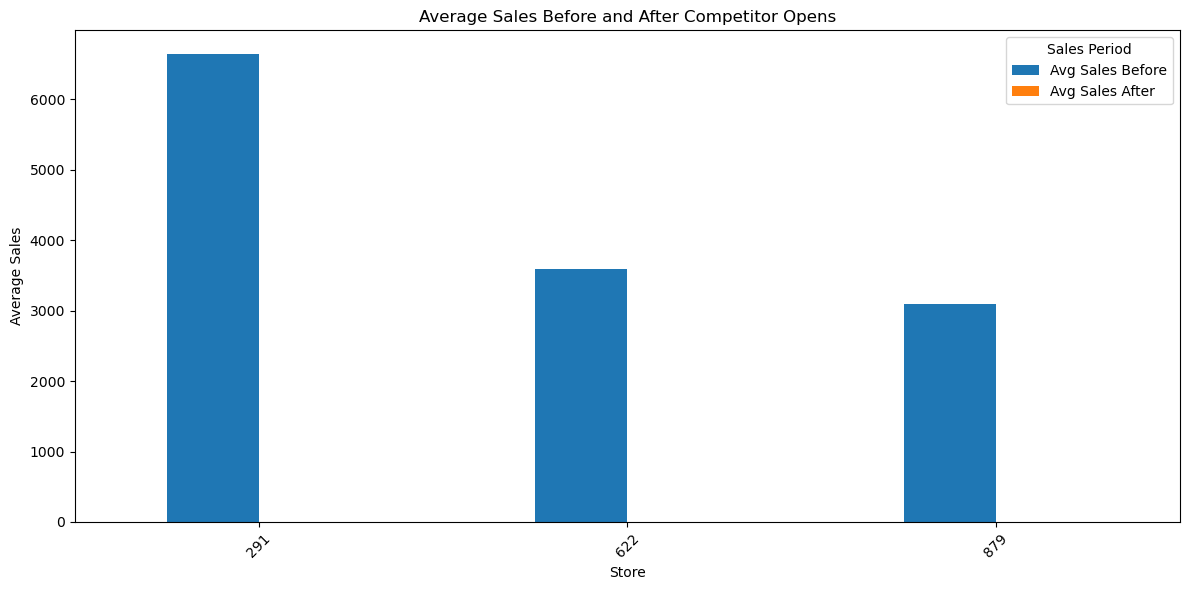

In [353]:
plt.figure(figsize=(12, 6))

# Create a bar plot for average sales comparison
sales_comparison_df.set_index('Store').plot(kind='bar', figsize=(12, 6))

# Adding titles and labels
plt.title('Average Sales Before and After Competitor Opens')
plt.xlabel('Store')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.legend(title='Sales Period', labels=['Avg Sales Before', 'Avg Sales After'])
plt.tight_layout()

# Show the plot
plt.show()

In [354]:
#1.2 -  Logging
#Log your steps using the logger library in Python for traceability and reproducibility.

import pandas as pd
import logging
import matplotlib.pyplot as plt

In [355]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

In [356]:
logger.info("Starting analysis of competitor distance effects on stores.")

2025-01-02 12:37:09,857 - INFO - Starting analysis of competitor distance effects on stores.


In [357]:
logger.info("Identifying stores with NA in CompetitionDistance that later have valid values.")

2025-01-02 12:37:30,715 - INFO - Identifying stores with NA in CompetitionDistance that later have valid values.


In [358]:
changing_distance_stores = merged_set[merged_set['CompetitionDistance'].isna()]
stores_with_changes = changing_distance_stores['Store'].unique()

In [359]:
logger.debug(f"Stores identified with changing distance: {stores_with_changes}")


In [360]:
valid_distance_stores = merged_set[merged_set['Store'].isin(stores_with_changes) & merged_set['CompetitionDistance'].notna()]

In [361]:
logger.info("Completed identification of stores with valid CompetitionDistance.")

2025-01-02 12:39:46,394 - INFO - Completed identification of stores with valid CompetitionDistance.


In [362]:
# Step 2: Compare Sales Before and After
logger.info("Comparing sales before and after competitors open.")

sales_comparison = []

for store in stores_with_changes:
    store_data = merged_set[merged_set['Store'] == store]
    
    before_data = store_data[store_data['CompetitionDistance'].isna()]
    after_data = store_data[store_data['CompetitionDistance'].notna()]
    
    avg_sales_before = before_data['Sales'].mean() if not before_data.empty else 0
    avg_sales_after = after_data['Sales'].mean() if not after_data.empty else 0
    
    sales_comparison.append({
        'Store': store,
        'Avg_Sales_Before': avg_sales_before,
        'Avg_Sales_After': avg_sales_after
    })

2025-01-02 12:40:32,982 - INFO - Comparing sales before and after competitors open.


In [363]:
logger.info("Sales comparison completed.")


2025-01-02 12:40:49,659 - INFO - Sales comparison completed.


In [364]:
sales_comparison_df = pd.DataFrame(sales_comparison)

2025-01-02 12:41:31,351 - INFO - Visualizing average sales before and after competitors open.


<Figure size 1200x600 with 0 Axes>

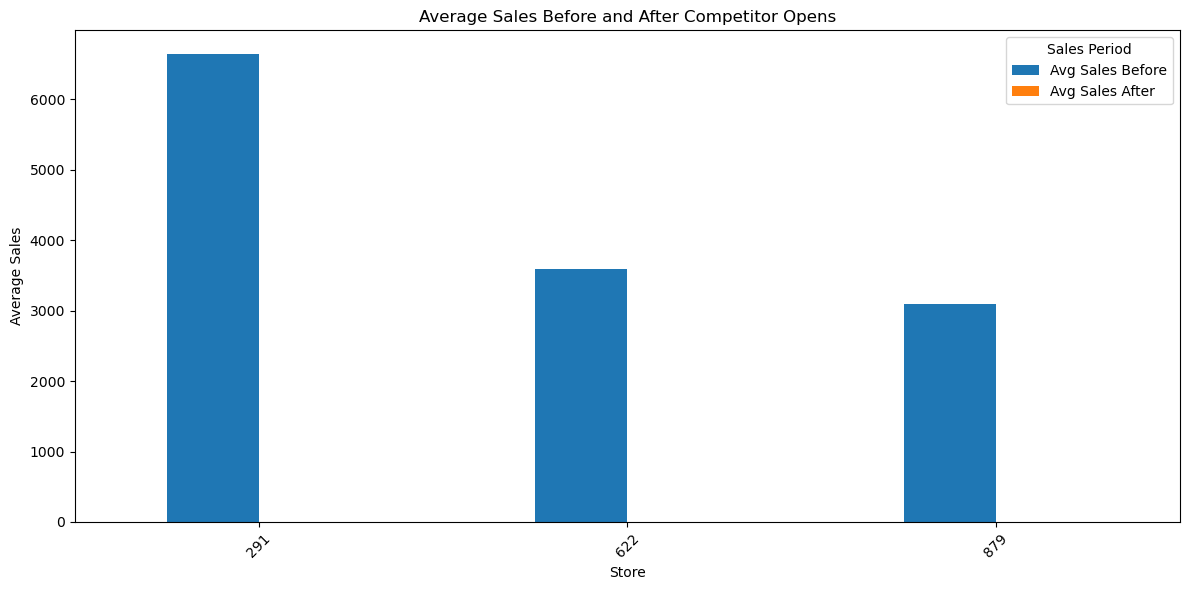

2025-01-02 12:41:32,181 - INFO - Visualization completed.


In [365]:
 #Step 3: Visualize the Results
logger.info("Visualizing average sales before and after competitors open.")
plt.figure(figsize=(12, 6))
sales_comparison_df.set_index('Store').plot(kind='bar', figsize=(12, 6))

plt.title('Average Sales Before and After Competitor Opens')
plt.xlabel('Store')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.legend(title='Sales Period', labels=['Avg Sales Before', 'Avg Sales After'])
plt.tight_layout()

plt.show()
logger.info("Visualization completed.")